# TASK 4

### Sales Prediction

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
path = "C:\\Users\\Purva\\Downloads\\advertising.csv"
df = pd.read_csv(path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
print(f"Data Contains {df.shape[0]} advertises, {df.shape[1]} Features.")

Data Contains 200 advertises, 4 Features.


In [10]:
print("Null Values:")
df.isna().sum().sort_values(ascending=False)

Null Values:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
print("Duplicated Rows:",df.duplicated().sum())

Duplicated Rows: 0


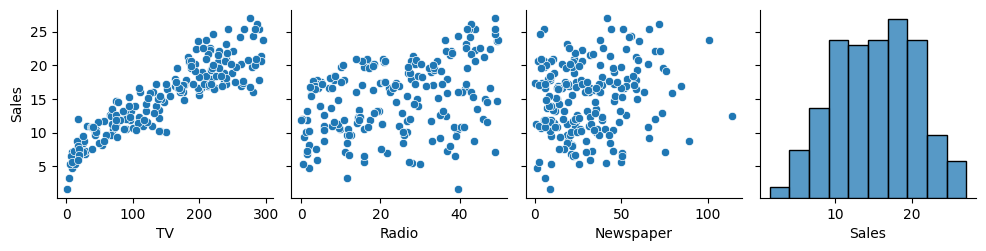

In [12]:
sns.pairplot(df, y_vars='Sales')
plt.show()

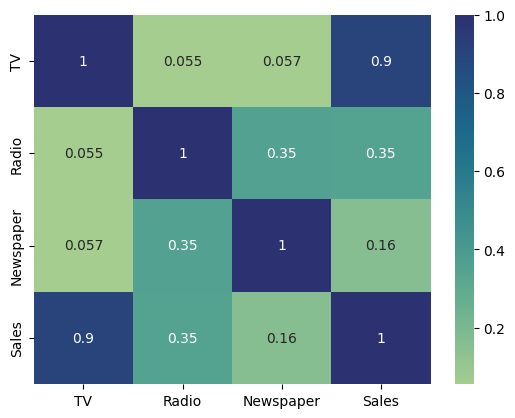

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.show()

**NOTE:**
'TV' feature is a strong correlation with Sales.

# Build ML model

In [14]:
# split data and score model
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression

In [15]:
X = df.drop('Sales', axis=1)
y = df['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=187)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(140, 3) (140,)
(60, 3) (60,)


In [16]:
lr = LinearRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(f'Train Score: {lr.score(x_train, y_train)*100:.2f}%')
print( f'Model score: {lr.score(x_test, y_test)*100:.2f}%')

Train Score: 87.27%
Model score: 95.16%


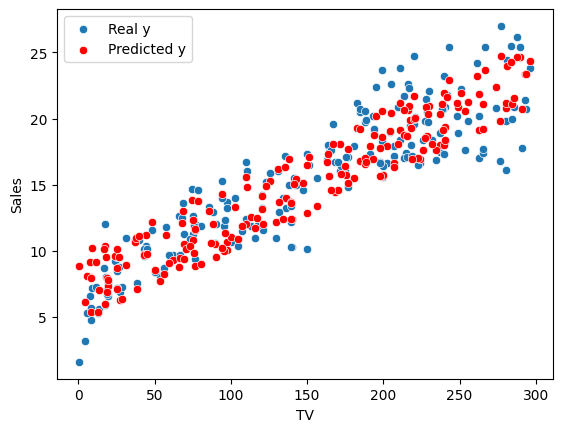

In [17]:
sns.scatterplot(data=df, x='TV', y='Sales', label='Real y')
sns.scatterplot(x=df.TV, y=lr.coef_[0]*df.TV + lr.coef_[1]*df.Radio + lr.coef_[2]*df.Newspaper + lr.intercept_, label='Predicted y',c='r')
plt.show()